In [1]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd
import urllib2

import json
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [4]:
filename = []
for i in range(2,4):
    for j in [1,4,6,8,9]:
        filename.append(url + 'pinc08_%s_1_%s.xls'%(i,j))

In [5]:
allmales = {}
allfemales= {}
for i in range(0,5):
     allmales[i] = pd.read_excel(urllib2.urlopen(filename[i]), header = 9)
#allmales[i] = allmales[i].drop(range(0,9),0)

for i in range(0,5):
     allfemales[i] = pd.read_excel(urllib2.urlopen(filename[i + 5]), header = 9)



allmales['all'] = allmales.pop(0)
allmales['white'] = allmales.pop(1)
allmales['black'] = allmales.pop(2)
allmales['asian'] = allmales.pop(3)
allmales['hispanic'] = allmales.pop(4)
allfemales['all'] = allfemales.pop(0)
allfemales['white'] = allfemales.pop(1)
allfemales['black'] = allfemales.pop(2)
allfemales['asian'] = allfemales.pop(3)
allfemales['hispanic'] = allfemales.pop(4)

In [77]:
allfemales['asian'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,....Total,5648.0,521.0,224.0,353.0,348.0,342.0,203.0,241.0,182.0,...,6.0,20.0,6.0,414.0,24840.0,888.0,36684.0,1111.0,0.533,0.0092
2,Earnings,4064.0,154.0,147.0,176.0,133.0,202.0,82.0,187.0,157.0,...,8.0,22.0,5.0,374.0,31363.0,555.0,43771.0,1439.0,0.478,0.0113
3,..Wages and Salary,3861.0,135.0,147.0,167.0,116.0,174.0,73.0,176.0,147.0,...,8.0,22.0,5.0,362.0,31802.0,614.0,44515.0,1502.0,0.474,0.0116
4,..Nonfarm Self-Employment,280.0,55.0,2.0,17.0,22.0,36.0,6.0,18.0,9.0,...,0.0,0.0,0.0,8.0,15231.0,2911.0,21155.0,2495.0,0.543,0.0390


In [7]:
import numpy as np

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns[1:] :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

/Users/macbook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
allmales["white"].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,....Total,73333.0,2913.0,1564.0,1632.0,2092.0,2479.0,1933.0,2930.0,2298.0,...,411.0,493.0,357.0,9669.0,40122.0,274.0,56368.0,593.0,0.493,0.0038
2,Earnings,55244.0,2195.0,1490.0,1480.0,1092.0,1830.0,771.0,1752.0,937.0,...,198.0,452.0,181.0,8048.0,44882.0,597.0,60075.0,707.0,0.483,0.0046
3,..Wages and Salary,51442.0,1859.0,1382.0,1407.0,976.0,1575.0,671.0,1575.0,866.0,...,197.0,436.0,181.0,7459.0,45554.0,309.0,60447.0,744.0,0.476,0.0049
4,..Nonfarm Self-Employment,4970.0,1041.0,204.0,221.0,157.0,397.0,96.0,236.0,89.0,...,0.0,14.0,0.0,413.0,20445.0,864.0,35925.0,1622.0,0.631,0.0099


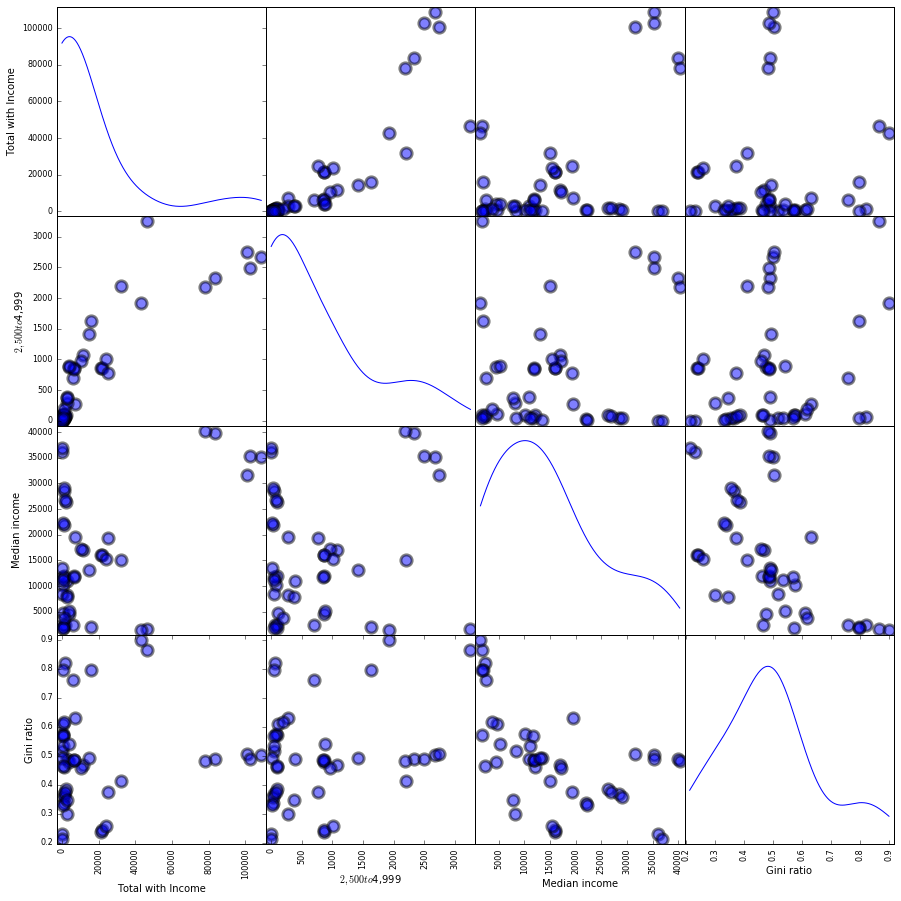

In [9]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  

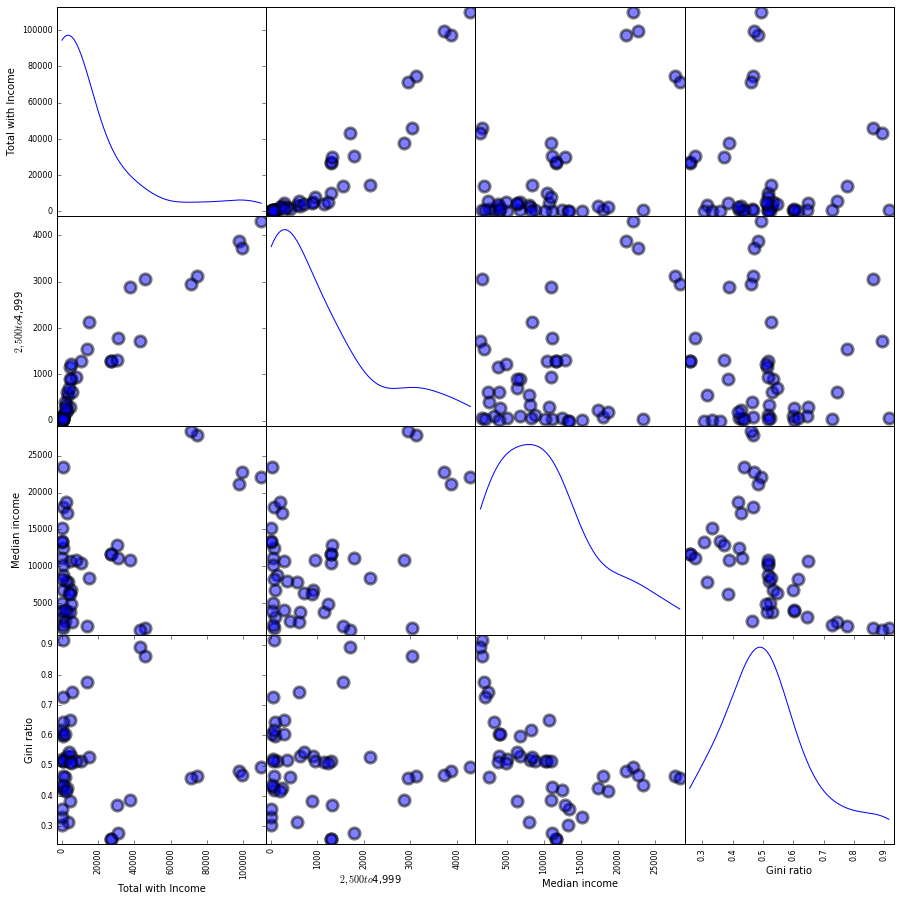

In [10]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  

In [11]:
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### all
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        17383.000000           2971.826087       1010.608696   
std         28945.070201           7604.959824       1190.210877   
min            84.000000              0.000000          6.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max        109956.000000          38367.000000       4298.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean        1148.869565       1470.391304         1469.478261   
std         1569.333455       2365.722680         2502.601125   
min            0.000000          2.000000            0.000000   
25%                 NaN               NaN           

/Users/macbook/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2120.260870            292.304348        141.021739   
std          3673.947011            563.958859        181.001595   
min             0.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14346.000000           2727.000000        679.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         140.934783        229.456522          179.021739   
std          203.026917        371.274843          321.057730   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN                 NaN 

Now we see how the male and female income relate to each other in each ethnicity by median income:

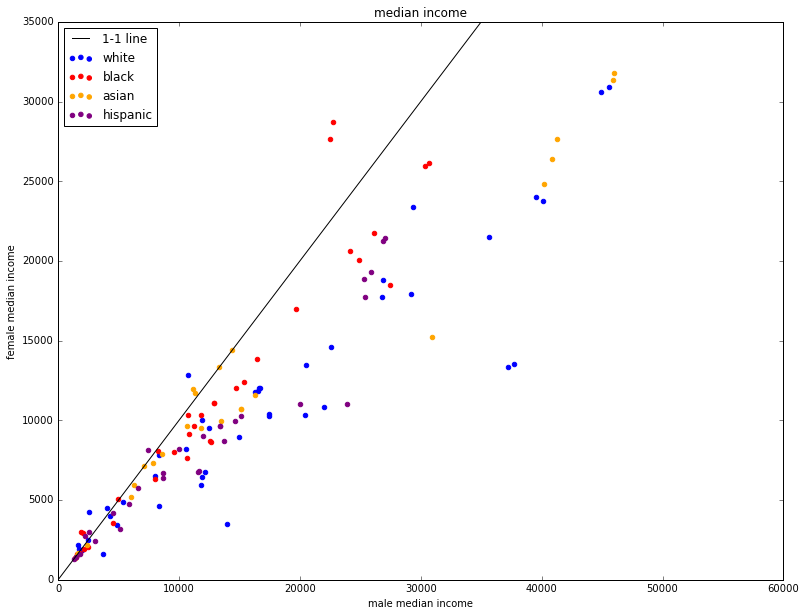

In [67]:
x = np.linspace(0, 50000, 100000).astype(int)

plt.figure(figsize = [13,10])
plt.axis([0,60000,0,35000])
plt.scatter(allmales['white']['Median income'][1:], allfemales['white']['Median income'][1:], color = 'blue', label = 'white')
plt.scatter(allmales['black']['Median income'][1:], allfemales['black']['Median income'][1:], color = 'red', label = 'black')
plt.scatter(allmales['asian']['Median income'][1:], allfemales['asian']['Median income'][1:], color = 'orange', label = 'asian')
plt.scatter(allmales['hispanic']['Median income'][1:], allfemales['hispanic']['Median income'][1:], color = 'purple', label = 'hispanic')
plt.plot(x, x, 'k', label = '1-1 line') 
plt.legend(loc = 'upper left')
plt.title('median income')
plt.xlabel('male median income')
plt.ylabel('female median income')


# draws a 1-1 line indicating when male and female employees are getting the same pay
#@Review:  Missing the male and female income relate to each other plot the Total Median Income 
#(from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

Make a regression model using spearman correlation values and plot them.

In [13]:
# use median number from the population.
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

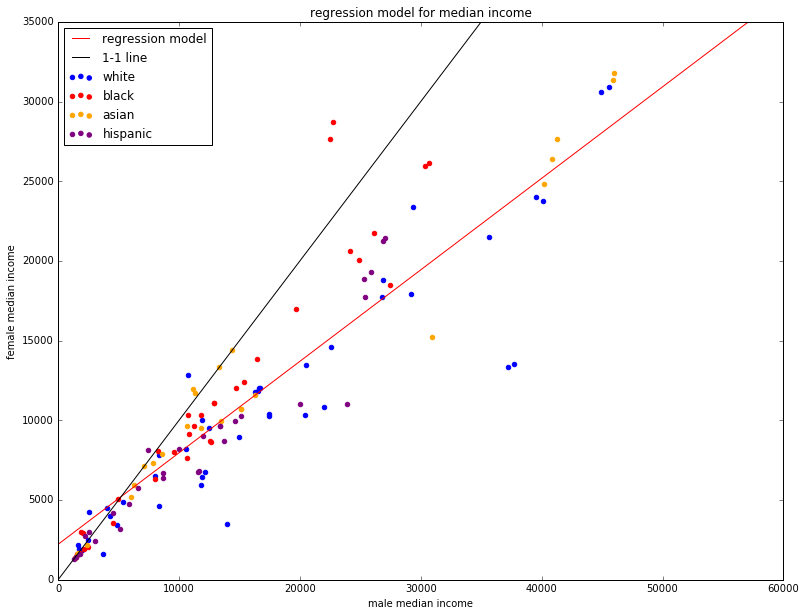

In [66]:
x = np.linspace(0, 60000, 100000).astype(int)
y = beta0 + beta1 * x

plt.figure(figsize = [13,10])
plt.axis([0,60000,0,35000])
plt.scatter(allmales['white']['Median income'][1:], allfemales['white']['Median income'][1:], color = 'blue', label = 'white')
plt.scatter(allmales['black']['Median income'][1:], allfemales['black']['Median income'][1:], color = 'red', label = 'black')
plt.scatter(allmales['asian']['Median income'][1:], allfemales['asian']['Median income'][1:], color = 'orange', label = 'asian')
plt.scatter(allmales['hispanic']['Median income'][1:], allfemales['hispanic']['Median income'][1:], color = 'purple', label = 'hispanic')
plt.plot(x, y, 'k', label = 'regression model', color = 'red') 
plt.plot(x, x, 'k', label = '1-1 line') 
plt.legend(loc = 'upper left')
plt.title('regression model for median income')
plt.xlabel('male median income')
plt.ylabel('female median income')

# draws a 1-1 line indicating when male and female employees are getting the same pay

# 5.

In [49]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                     for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#creating a mask list to imply which row has nan number
mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))

In [50]:
#drop rows that contains nan value
all_males_allincomes = all_males_allincomes[mask]
all_females_allincomes = all_females_allincomes[mask]

In [51]:
#make the regression fitting
import statsmodels.api as sm
all_males_allincomes = sm.add_constant(all_males_allincomes)

model = sm.OLS(all_females_allincomes,  all_males_allincomes)
result = model.fit()
w = result.params


In [20]:
y2 = w[0] + w[1]*x

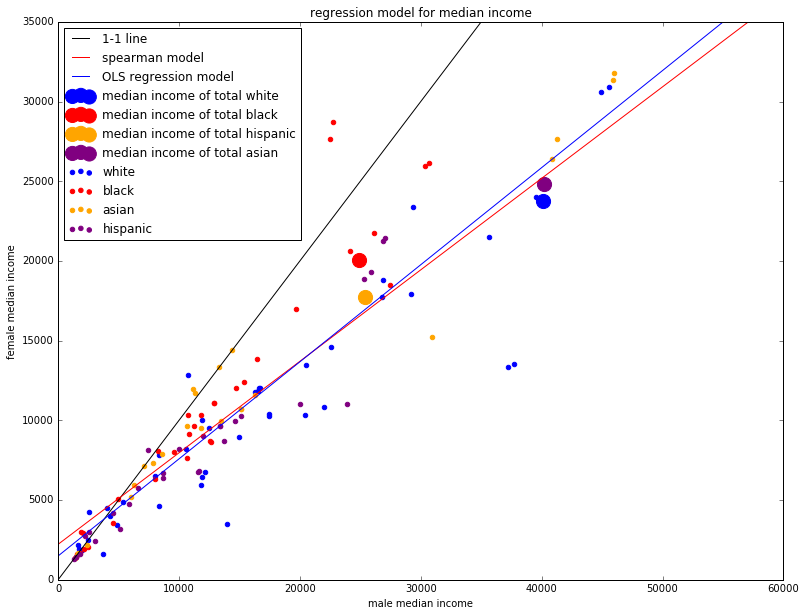

In [64]:
plt.figure(figsize = [13,10])
plt.axis([0,60000,0,35000])

plt.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1],  s = 200, color = 'blue', label = 'median income of total white', marker=u'o')
plt.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1],  s = 200, color = 'red', label = 'median income of total black', marker=u'o')
plt.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1], s = 200, color = 'orange', label = 'median income of total hispanic', marker=u'o')
plt.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1],  s = 200, color = 'purple', label = 'median income of total asian', marker=u'o')
plt.scatter(allmales['white']['Median income'][2:], allfemales['white']['Median income'][2:], color = 'blue', label = 'white')
plt.scatter(allmales['black']['Median income'][2:], allfemales['black']['Median income'][2:], color = 'red', label = 'black')
plt.scatter(allmales['asian']['Median income'][2:], allfemales['asian']['Median income'][2:], color = 'orange', label = 'asian')
plt.scatter(allmales['hispanic']['Median income'][2:], allfemales['hispanic']['Median income'][2:], color = 'purple', label = 'hispanic')
plt.plot(x, x, 'k', label = '1-1 line') 
plt.plot(x, y, 'k', label = 'spearman model', color = 'red')
plt.plot(x, y2, 'k', label = 'OLS regression model', color = 'blue') 
plt.legend(loc = 'upper left')
plt.title('regression model for median income')
plt.xlabel('male median income')
plt.ylabel('female median income')


# draws a 1-1 line indicating when male and female employees are getting the same pay

6. My chosen female salary is 25000. $y = 25000$ 

In [72]:
y = 25000

def male(y):
    ''' function returns male salary according to OLS regression model with known female salary'''
    w = result.params
    male_salary = (y - w[0]) / w[1]
    return male_salary

male(y)

38597.977649796761

Males at the same position as a women make $25000 would receive a salary of $38597.

7. 
According to the plot, if we look at the total income, White and Asians make more income than Black and Hispanics.
If we focus on income differences between genders, the difference from severe to mild ranks white, asian, hispanic, black.

If we want to get a better idea in how the income difference in gender differs in ethnicity groups, I would do a regression on each ethnicity group and see the difference in coeffient.